# Homework 04 - Visualization
(Total 5 points)  
Homework 04 is due **10/9/2021** Sat. 11:59pm  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


## Question 1 
0.5 point for (Q1-1 to Q1-4) and 0.5 for Q1-5

Problem 1 Data is provided as follows:

In [4]:
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)  #Return evenly spaced numbers over a specified interval.
y = np.cos(x)
y1 = np.sin(x)


Given the data `x`, `y`, and `y1` above, complete the code and create the plot as instructed.

(Answers for Q1 1-4 should be written together in coding area below in order to generate a single plot)

**1-1**: Create a line plot to show `x, y and y1` (two lines) in the same plot, and define plot **"title"** as "Functions sin and cos" 

**1-2**: Format the ticks at specific values 

For x ticks, the value is `['$-\pi$', '$-\pi/2$', '$0$', '$+\pi/2$', '$+\pi$']`, at the location `[-np.pi, -np.pi/2, 0, np.pi/2, np.pi]`  
For y ticks, the value is `['$-1$', '$0$', '$+1$']`, at the location `[-1, 0, +1]`  

*hint: use `xticks` and `yticks` function*. And you will see the strange formula such as `r'$-\pi$'` will turn into nice mathematics presentation after you run the full code.

**1-3** draw a horizontal line and vertical line at 0 using `axhline` and `axvline` function (default settings)

**1-4** set x limit of -2 to 2, and y limit of -1 to 1

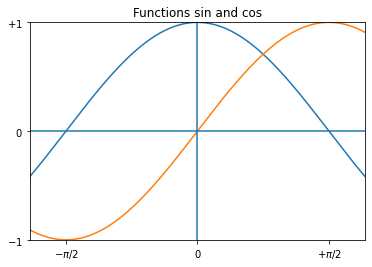

In [5]:
# 1-1 provide your answer here
plt.plot(x,y)
plt.plot(x,y1)
plt.title("Functions sin and cos")

# 1-2 provide your answer here
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['$-\pi$', '$-\pi/2$', '$0$', '$+\pi/2$', '$+\pi$'])
plt.yticks([-1, 0, +1], ['$-1$', '$0$', '$+1$'])

# 1-3 provide your answer here
plt.axhline(0)
plt.axvline(0)

# 1-4 provide your answer here
plt.xlim([-2,2])
plt.ylim([-1,1])

plt.show()


**1-5** Using "fig.add_subplot()" to plot line 1 for (x, y) and line 2 for (x, y1) in a grid space of 1 row by 2 columns. Set the linewidth to 5, linestyle is dash line, and color to red and blue, respectively. Then show the plot.

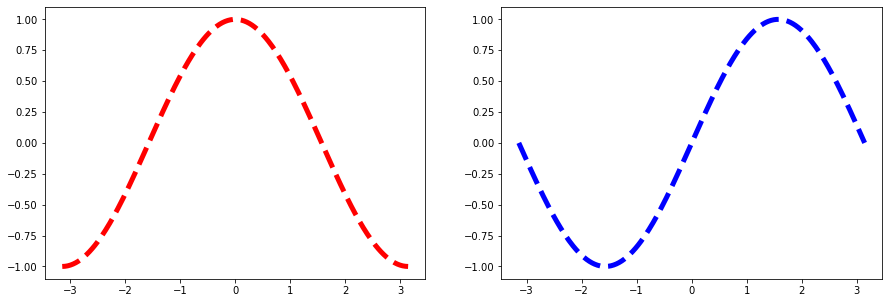

In [6]:
fig = plt.figure(figsize=(15,5))

# 1-5 provide your answer here
line1=fig.add_subplot(1,2,1)
line1.plot(x, y, "r--", linewidth=5)

line2=fig.add_subplot(122)
line2.plot(x, y1, "b--", linewidth=5)

plt.show()


## Problem 2 Iris Data Analysis 
4 points: each question with 0.5 point

The `Iris` flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper *The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.* Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

For homework, we will perform initial exploratory data analysis (EDA) and visualization using the dataset.

![alt text](Iris_plant.png)

In [2]:
from sklearn import datasets
iris = datasets.load_iris()


In [3]:
IRIS = pd.DataFrame(iris.data, columns = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"])
print(IRIS.shape)
IRIS.head()


(150, 4)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X_Type = iris.target
X_Name = ['Setosa','Versicolour', 'Virginica']
IRIS['Type'] = np.where(X_Type == 0, X_Name[0], np.where(X_Type == 1, X_Name[1], X_Name[2]))


In [5]:
print(IRIS.shape)
IRIS.head()


(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Type
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Q2-1 
Explore the data, e.g. using `describe` and/or other overview function to output the summary statistics of the numeric values `sepal_length, sepal_width, pedal_length, pedal_width` (only one overview function is needed to get credit, but you are welcome to add more overview functions to help you learn more about the data, as we will use this data set extensively in the future lectures.)

In [10]:
#provide your answer here 
IRIS.describe()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Q2-2 
It will be interesting to see if the numeric values `sepal_length, sepal_width, pedal_length, pedal_width` has any kind of relationships among them.  
Looking at the correlation among the variables is normally a good start for getting insights of the data/fields.  

For homework exercise, use the `corr` and `sns.heatmap` function (taught in class) to plot the correlation heatmap among the four numeric variables. 
Your output figures should be similar to the output plot as below that the pairwise correlations are shown in the plot with "annot=True".  

<AxesSubplot:>

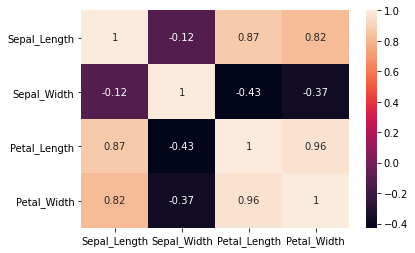

In [7]:
# provide your answer here
sns.heatmap(IRIS.corr(), annot=True)


As is expected, there is a strong correlation between `pedal_length, pedal_width` ($\rho = 0.96$).   
However, the relationship between the `sepal_length, sepal_width` is not so clear ($\rho = -0.12$).

Given the above information, seems the relationship between `sepal_length, sepal_width` is not so clear, let's try more charting methodologies to see if there is any clue (as learning experience, some types of charts may not work well)

### Q2-3 Line Chart: 
Given the IRIS is imported as pandas, we can pd.plot.line() to plot line chart for `Sepal_Length` and `Sepal_Width` columns. **One line for each column**. Show the legends to distinguish which line stands for. Your output figures should be similar to the outoput as below.

<function matplotlib.pyplot.show(close=None, block=None)>

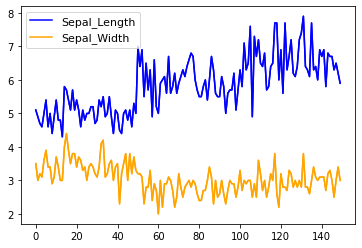

In [8]:
#provide your answer here
IRIS['Sepal_Length'].plot(legend=True, color='blue')
IRIS['Sepal_Width'].plot(legend=True, color='orange')
plt.legend(loc="upper left", fontsize=11)
plt.plot(IRIS["Sepal_Length"], color='blue')
plt.plot(IRIS["Sepal_Width"], color='orange')

plt.show


<AxesSubplot:>

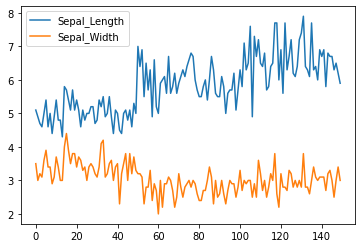

In [9]:
# easier 
IRIS[['Sepal_Length', 'Sepal_Width']].plot.line()

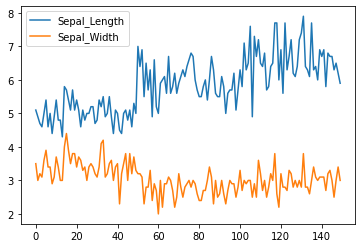

In [10]:
# or
plt.plot(IRIS.Sepal_Length)
plt.plot(IRIS.Sepal_Width)
plt.legend(['Sepal_Length', 'Sepal_Width'],loc=0)

Seems line chart does not offer a lot of clues. We may want to switch to different charts.

### Q2-4 Histogram: 
Plot histogram for `Sepal_Length` and `Sepal_Width` columns. One **chart** for each column in a grid space of 1 row by 2 columns using layout=(1,2). Show the legends to distinguish which line stands for. Your output figures should be similar to the output example.

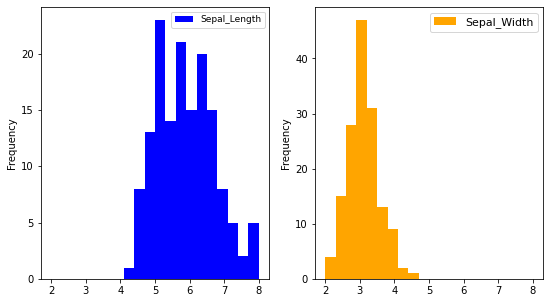

In [14]:
#provide your answer here
plt.figure(figsize=(9,5))
plt.subplot(121)
plt.hist(IRIS.Sepal_Length,bins=20, color='blue', range=(2,8),label='Sepal_Length')
plt.ylabel("Frequency")
plt.legend(fontsize=9)
plt.subplot(122)
plt.hist(IRIS.Sepal_Width,bins=20, color='orange', range=(2,8),label='Sepal_Width')
plt.ylabel("Frequency")
plt.legend(fontsize=11); plt.show()



array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

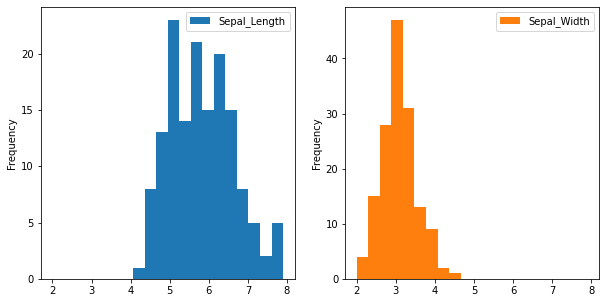

In [16]:
#easier
IRIS[['Sepal_Length', 'Sepal_Width']].plot.hist(subplots=True, layout=(1,2), figsize=(10, 5), bins=20)

Both line chart and histogram provide limited information about the data. Let's explore some other ways.

### Q2-5  Scatter plot of 2 columns

Another way to study the relationship between fields are: scatter plot. 

First use the `implicit` method taught in the class.   
For the two `Sepal_Length` and `Sepal_Width` fileds, in order to explore their relationship, treat them as y and x variables seperately (`x='Sepal_Length', y='Sepal_Width'`).    
Use the `scatter` function to create the plot.

<AxesSubplot:title={'center':'Iris Scatter Plot'}, xlabel='Sepal_Length', ylabel='Sepal_Width'>

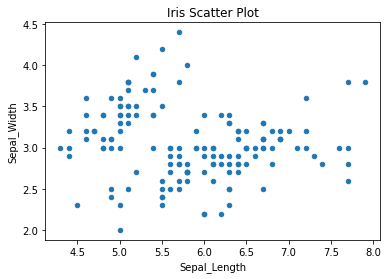

In [68]:
# provide your answer here
IRIS.plot.scatter(x='Sepal_Length', y='Sepal_Width', title='Iris Scatter Plot')

### Q2-6 Scatter plot 2
Alternatively, use the `explicit` method shownd in the class note, first create a figure and an axis (`fig` and `ax`) using `plt.subplots` method.   
1) Use `ax` object to create the scatter plot.  
2) Give the plot a title and (x and y) labels.   
3) Complete the code below to create the plot shown in the target result sheet

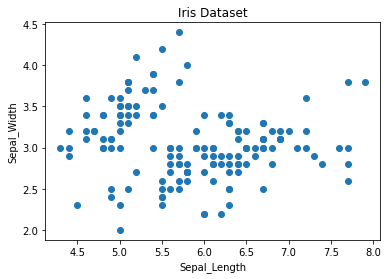

In [14]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
# provide your answer here
ax.scatter(IRIS['Sepal_Length'],IRIS['Sepal_Width'])

# easier code to use
# ax.set_title('Iris Dataset')
# ax.set_xlabel('Sepal_Length')
# ax.set_ylabel('Sepal_Width')


# set a title
# provide your answer here
plt.title("Iris Dataset")

# set x labels
# provide your answer here
plt.xlabel("Sepal_Length")

# set y labels
# provide your answer here
plt.ylabel('Sepal_Width')

plt.show()

### Q2-7 Scatter plot 3 
Iris has three types, 'Setosa', 'Versicolour' and 'Virginica'. the relationship among them are still not clear. Let's keep digging. Next we would like to distinsh the scatter dots with three differernt colors to show how the three types in the above scatter chat (may consider using explicit method and for loop), and see if there is change in the observed relationship.

hint: you may create a list of the length of IRIS with 3 different colors, e.g use color = colors[IRIS.Type][i]] in your scatter plot settings, in order to leveraging colors = {'Setosa':'r', 'Versicolour':'g', 'Virginica':'b'}

In [85]:
IRIS.Type.unique()

array(['Setosa', 'Versicolour', 'Virginica'], dtype=object)

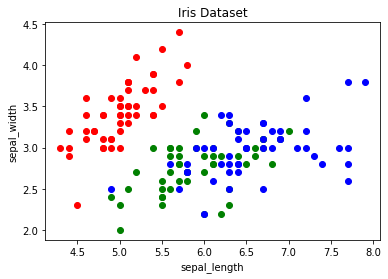

In [86]:
# create color dictionary, for example Setosa will be labeled red
IRIS_Type_unique = IRIS.Type.unique()
colors = {IRIS_Type_unique[0]:'r', IRIS_Type_unique[1]:'g', IRIS_Type_unique[2]:'b'}

# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point using three different colors
for i in range(len(IRIS)):
# provide your answer here
    
# set a title
# provide your answer here

# set x labels
# provide your answer here

# set y labels
# provide your answer here

plt.savefig("IRIS_scatterplot3.png")
plt.show()

### Q2-8 
Check the size of output image file "IRIS_scatterplot3.png" in the Q2-7 plt.savefig()
This question involved python os package.
1) you can check if the image file "IRIS_scatterplot3.png" is exported to your current path by os.path.exists(). It will return True if yes, otherwise False

2) then use os.path.getsize() to get the size of image file.

File IRIS_scatterplot3.png is in curent path.

Size of 'IRIS_scatterplot3.png' in byte is 10188:


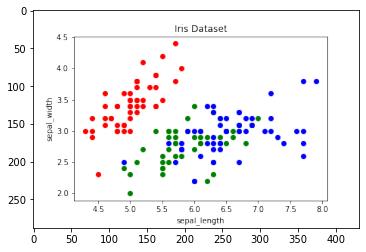

In [121]:
import os 
import matplotlib.image as img

im = img.imread('IRIS_scatterplot3.png')
  
# show image
plt.imshow(im)

#check if image file in current path
# provide your answer here
in_path = os.path.exists('IRIS_scatterplot3.png')

if in_path:
    # provide your answer here
    
else:
    print("File IRIS_scatterplot3.png is not in curent path.\n")      